In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Parameters #
S = 100           # Current price of stock
K = 105           # Strike price of European call option
n = 5             # Number of periods in the binomial model
T = 1             # Years to expiration
sigma = 0.1       # Standard deviation of returns (continuously compounded)
r_f = 0.01        # Risk-free rate

In [3]:
u = pow(math.e, sigma * math.sqrt(T / n))
d = 1 / u
R = pow(math.e, r_f * T / n)
q = (R - d) / (u - d)
q_c = 1 - q

In [4]:
df = np.array([[-1.0 for i in range(n+1)] for j in range(n+1)])
temp = S
height = 0
for i in range(n+1):
    df[0][i] = temp
    for j in range(height):
        temp *= d * d
        df[j+1][i] = temp
    temp = df[0][i] * u
    height += 1
if n < 10:
    print(df.round(2))

[[100.   104.57 109.36 114.36 119.59 125.06]
 [ -1.    95.63 100.   104.57 109.36 114.36]
 [ -1.    -1.    91.44  95.63 100.   104.57]
 [ -1.    -1.    -1.    87.44  91.44  95.63]
 [ -1.    -1.    -1.    -1.    83.62  87.44]
 [ -1.    -1.    -1.    -1.    -1.    79.96]]


In [5]:
for i in range(n+1):
    if df[i][n] > K:
        df[i][n] -= K
    else:
        df[i][n] = 0

height = n
for i in reversed(range(n)):
    for j in reversed(range(height)):
        expected = (1 / R) * (q * df[j][i+1] + q_c * df[j+1][i+1])
        df[j][i] = expected
    height -= 1
if n < 10:
    print(df.round(3))
print('The option price given by a', n, 'period binomial model is $', round(df[0][0], 3))

[[ 2.24   3.784  6.228  9.879 14.798 20.058]
 [-1.     0.634  1.243  2.436  4.774  9.358]
 [-1.    -1.     0.     0.     0.     0.   ]
 [-1.    -1.    -1.     0.     0.     0.   ]
 [-1.    -1.    -1.    -1.     0.     0.   ]
 [-1.    -1.    -1.    -1.    -1.     0.   ]]
The option price given by a 5 period binomial model is $ 2.24


In [6]:
def binomial_price(S, K, n, T, sigma, r_f):
    u = pow(math.e, sigma * math.sqrt(T / n))
    d = 1 / u
    R = pow(math.e, r_f * T / n)
    q = (R - d) / (u - d)
    q_c = 1 - q
    df = np.array([[-1.0 for i in range(n+1)] for j in range(n+1)])
    temp = S
    height = 0
    for i in range(n+1):
        df[0][i] = temp
        for j in range(height):
            temp *= d * d
            df[j+1][i] = temp
        temp = df[0][i] * u
        height += 1
    for i in range(n+1):
        if df[i][n] > K:
            df[i][n] -= K
        else:
            df[i][n] = 0
    height = n
    for i in reversed(range(n)):
        for j in reversed(range(height)):
            expected = (1 / R) * (q * df[j][i+1] + q_c * df[j+1][i+1])
            df[j][i] = expected
        height -= 1
    return df[0][0]

In [7]:
d1 = math.log(S / K) + T * (r_f + (pow(sigma, 2) / 2))
d1 /= (sigma * math.sqrt(T))
d2 = d1 - (sigma * math.sqrt(T))
N1 = norm.cdf(d1)
N2 = norm.cdf(d2)
black_scholes = (S * N1 - K * pow(math.e, -r_f * T) * N2)

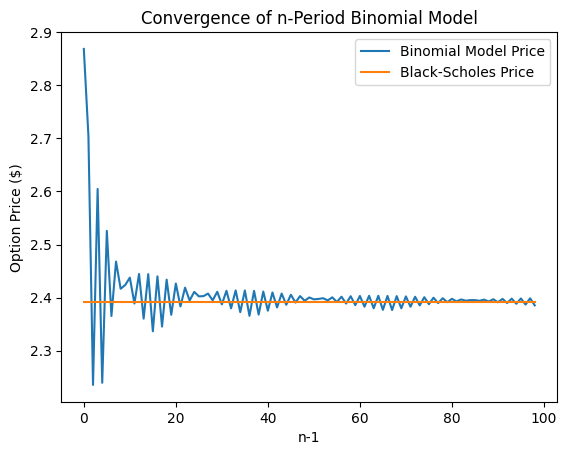

In [8]:
max_n = 100

black_scholes_line = [black_scholes for i in range(1, max_n)]
data_points = []
for i in range(1, max_n):
    data_points.append(binomial_price(S, K, i, T, sigma, r_f))
plt.plot(data_points)
plt.plot(black_scholes_line)
plt.title('Convergence of n-Period Binomial Model')
plt.xlabel('n-1')
plt.ylabel('Option Price ($)')
plt.legend(['Binomial Model Price', 'Black-Scholes Price'])
plt.show()